In [1]:
en_text = "A Dog Run back corner near spare bedrooms"

In [7]:
import spacy
spacy_en = spacy.load("en_core_web_sm")

In [8]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [9]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [10]:
import nltk

In [11]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [12]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [13]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [14]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


- 한국어와 영어 토큰화의 차이점
  - 영어는 띄어쓰기 기준으로 토큰화해도 큰 차이가 없다
  - 한국어는 띄어쓰기로 했을 경우 큰 어려움이 생김
    - 다른 조사가 붙은 같은 단어를 다른 단어로 인식함

In [17]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사왔어']


In [18]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


In [19]:
import urllib.request
import pandas as pd
from konlpy.tag import Okt
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [20]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt')
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [21]:
print("전체 샘플의 수 : {}".format(len(data)))

전체 샘플의 수 : 200000


In [22]:
sample_data = data[:100]

In [26]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
sample_data[:10]

C:\Users\user\AppData\Local\Temp\ipykernel_9452\21947032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [27]:
stopwords = ['의', '가', '은', '는', '을', '를', '들', '좀', '잘', '걍', '과', '도', '으로', '자', '에', '와', '한', '하다']

In [28]:
tokenizer = Okt()
tokenized = []
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    tokenized.append(temp)

In [29]:
print(tokenized[:10])

[['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ'], ['디자인', '배우는', '학생', ',', '외국', '디자이너', '그', '이', '일군', '전통', '통해', '발전', '해가는', '문화', '산업', '이', '부러웠는데', '.', '사실', '우리나라', '에서도', '그', '어려운', '시절', '끝', '까지', '열정', '지킨', '노라노', '같은', '전통', '이', '있어', '저', '같은', '사람', '이', '꿈', '꾸고', '이뤄', '나갈', '수', '있다는', '것', '감사합니다', '.'], ['폴리스스토리', '시리즈', '1', '부터', '뉴', '까지', '버릴께', '하나', '없음', '..', '최고', '.'], ['..', '연기', '진짜', '개', '쩔구나', '..', '지루할거라고', '생각', '했는데', '몰입', '해서', '봤다', '..', '그래', '이런게', '진짜', '영화', '지'], ['안개', '자욱한', '밤하늘', '떠', '있는', '초승달', '같은', '영화', '.'], ['사랑', '해본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃을수', '있는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '2', '나오나요', '?', '나오면', '1', '빠', '로', '보고', '싶음'], ['굿'], ['바보', '아니라', '병', '쉰', '인듯']]


In [30]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 797


In [31]:
vocab['지금']

5

In [32]:
vocab_size = 500
vocab = vocab.most_common(vocab_size)
print("단어 집합의 크기 : {}".format(len(vocab)))

단어 집합의 크기 : 500


In [33]:
word_to_index = {word[0] : index +2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [34]:
encoded = []
for line in tokenized:
    temp = []
    for w in line:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['unk'])
    encoded.append(temp)

In [35]:
print(encoded[:10])

[[51, 14, 41, 28, 29, 52, 159, 30], [160, 161, 162, 6, 163, 164, 15, 3, 165, 82, 166, 167, 168, 83, 169, 3, 170, 2, 42, 84, 85, 15, 171, 172, 86, 20, 173, 174, 175, 31, 82, 3, 176, 32, 31, 21, 3, 177, 178, 179, 180, 33, 181, 53, 182, 2], [183, 184, 54, 34, 185, 20, 186, 87, 88, 5, 7, 2], [5, 22, 16, 89, 187, 5, 188, 17, 55, 189, 90, 91, 5, 190, 191, 16, 4, 92], [192, 193, 194, 195, 93, 196, 31, 4, 2], [94, 197, 21, 3, 95, 96, 34, 86, 20, 198, 93, 4], [97, 18, 199, 29, 52, 18], [89, 200, 98, 201, 11, 202, 54, 203, 23, 41, 204], [99], [205, 206, 207, 208, 209]]


리뷰의 최대 길이 : 51
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 12.9


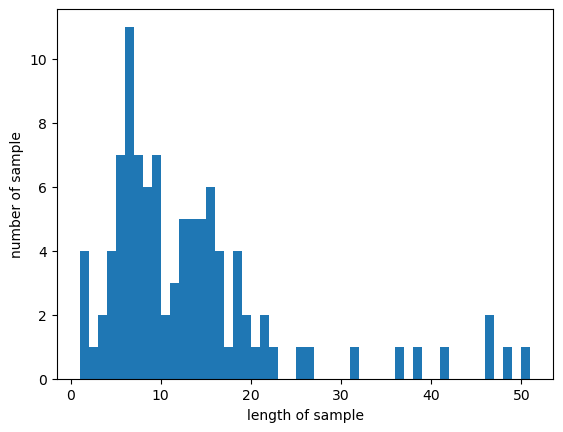

In [37]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins = 50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [38]:
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index['pad']] * (max_len - len(line))

In [39]:
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 51
리뷰의 최소 길이 : 51
리뷰의 평균 길이 : 51.0


In [40]:
print(encoded[:3])

[[51, 14, 41, 28, 29, 52, 159, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [160, 161, 162, 6, 163, 164, 15, 3, 165, 82, 166, 167, 168, 83, 169, 3, 170, 2, 42, 84, 85, 15, 171, 172, 86, 20, 173, 174, 175, 31, 82, 3, 176, 32, 31, 21, 3, 177, 178, 179, 180, 33, 181, 53, 182, 2, 1, 1, 1, 1, 1], [183, 184, 54, 34, 185, 20, 186, 87, 88, 5, 7, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
